# Purpose:
- Population angle classification across learning
- 45 vs 135 only
- Using LDA
- If LDA results in saturated performance, try clustering index
- First, look at variance explained from PCA

In [91]:
import numpy as np
import pandas as pd
import xarray as xr
from pathlib import Path
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.metrics import accuracy_score
import utils.matched_roi as mr
import utils.merged_df_annotation as mda
import utils.population_activity as pa
import utils.lda_angle_discrim as lda_angle
from importlib import reload

base_dir = Path(r'E:\TPM\JK\h5')

expert_mice_df = pd.read_csv(base_dir / 'expert_mice.csv', index_col=0)
use_mice_df = expert_mice_df.loc[expert_mice_df['depth_matched'].astype(bool) & 
                                 ~expert_mice_df['processing_error'].astype(bool) &
                                 ((expert_mice_df.session_type == 'training') |
                                  (expert_mice_df.session_type.str.contains('test')))]

mice = [25,27,30,36,39,52]
test_sessions = [[4,19], [3,8], [3,21], [1,17], [1,23], [3,21]]

In [27]:
use_mice_df.query('mouse==25 and plane == 5')

,Unnamed: 0.1,mouse,plane,session,session_type,depth_matched,processing_error,remove_frame_ind
109,109,25,5,2,training,True,False,0
110,110,25,5,3,training,True,False,0
111,111,25,5,4,test_naive,True,False,0
112,112,25,5,5,training,True,False,0
113,113,25,5,6,training,True,False,0
114,114,25,5,7,training,True,False,0
115,115,25,5,8,training,True,False,0
116,116,25,5,9,training,True,False,0
117,117,25,5,10,training,True,False,0
118,118,25,5,11,training,True,False,0


# PCA dimensions
- Look at variance explained of touch responses across sessions
- Also touch response after answer, activity before pole up, and after pole down

In [31]:
# # All the sessions
# # Takes about 51 min
# reload(pa)
# reload(mda)
# touch_window='before_answer'
# spk_norm='std'
# varexp_threshold = 0.05
# post_touch_frames=1
# run_mouse = []
# run_volume = []
# run_session = []
# explained_variances_fit = []
# explained_variances_all = []
# num_trials = []
# num_cells_all = []
# num_cells_fit = []
# angles = np.arange(45, 150, 15)
# for mi in range(len(mice)):
#     mouse = mice[mi]
#     for volume in range(1,3):
#         top_plane = 1 if volume == 1 else 5
#         sessions_str = use_mice_df.query('mouse==@mouse and plane==@top_plane').session.values
#         for session_str in sessions_str:
#             session = int(session_str)
            
#             if len(use_mice_df.query('mouse == @mouse and plane == @top_plane and session == @session_str')) > 0:
#                 per_touch_response_xr_fit, per_touch_response_df, per_touch_response_xr = \
#                     pa.get_touch_response_xr_varexp_threshold(base_dir, mouse, top_plane, session,
#                                                         touch_window=touch_window, 
#                                                         spk_norm=spk_norm,
#                                                         varexp_threshold=varexp_threshold,
#                                                         post_touch_frames=post_touch_frames)
#                 num_cells_all.append(per_touch_response_xr.shape[1])
#                 num_cells_fit.append(per_touch_response_xr_fit.shape[1])
#                 pca = PCA()
#                 pca.fit(per_touch_response_xr_fit.values)
#                 explained_variances_fit.append(pca.explained_variance_ratio_)
#                 pca = PCA()
#                 pca.fit(per_touch_response_xr.values)
#                 explained_variances_all.append(pca.explained_variance_ratio_)

#                 temp_num_trials = []
#                 for angle in angles:
#                     temp_num_trials.append(len(per_touch_response_df.query('pole_angle == @angle')))
#                 num_trials.append(temp_num_trials)
#                 run_mouse.append(mouse)
#                 run_volume.append(volume)
#                 run_session.append(session)
# expvar_results = pd.DataFrame({'mouse': run_mouse, 'volume': run_volume, 'session': run_session,
#                                  'explained_variances_fit': explained_variances_fit,
#                                  'explained_variances_all': explained_variances_all,
#                                  'num_trials': num_trials,
#                                  'num_cells_fit': num_cells_fit,
#                                  'num_cells_all': num_cells_all,
#                                  })


In [33]:
# results_dir = Path(r'E:\TPM\JK\h5\results\neural_stretching\lda_performances')
# expvar_results.to_pickle(results_dir / 'explained_variances_expert_all_sessions_before_answer.pkl')

In [ ]:
results_dir = Path(r'E:\TPM\JK\h5\results\neural_stretching\lda_performances')
expvar_results = pd.read_pickle(results_dir / 'explained_variances_expert_all_sessions_before_answer.pkl')

In [36]:
mi = 0
mouse = mice[mi]
temp_expvar = expvar_results.query('mouse == @mouse')
volume = 1



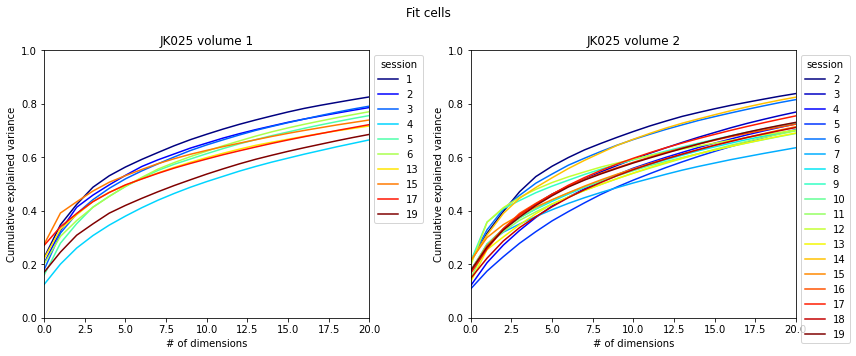

In [62]:
fig, ax = plt.subplots(1,2,figsize=(12,5))
volumes = [1,2]
for vi in range(2):
    volume = volumes[vi]
    temp_volume_data = temp_expvar.query('volume==@volume').reset_index()

    colors = plt.cm.jet(np.linspace(0,1,len(temp_volume_data)))
    for i, row in temp_volume_data.iterrows():
        ax[vi].plot(np.cumsum(row['explained_variances_fit']), color=colors[i], label=row['session'])
    ax[vi].legend(loc='upper left', bbox_to_anchor=(1,1), title='session')
    ax[vi].set_xlim(0,20)
    ax[vi].set_ylim(0,1)
    ax[vi].set_xlabel('# of dimensions')
    ax[vi].set_ylabel('Cumulative explained variance')
    ax[vi].set_title(f'JK{mouse:03} volume {volume}')
fig.suptitle('Fit cells')
fig.tight_layout()


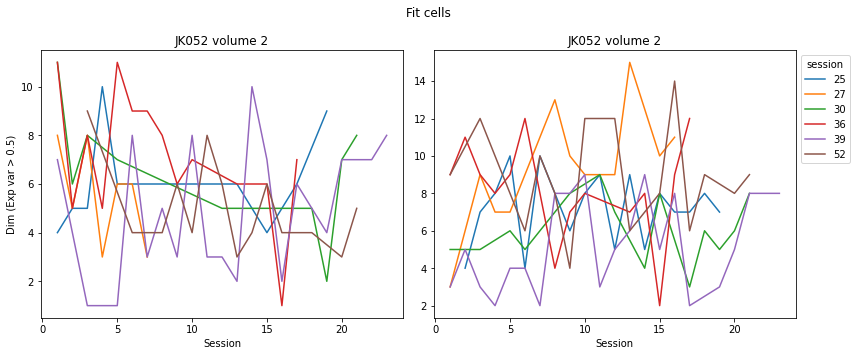

In [72]:
# Calculate dimensions of explained variance 0.5
fig, ax = plt.subplots(1,2,figsize=(12,5))
for mouse in mice:
    temp_expvar = expvar_results.query('mouse == @mouse')
    volumes = [1,2]
    for vi in range(2):
        volume = volumes[vi]
        temp_volume_data = temp_expvar.query('volume==@volume').reset_index()
        temp_volume_data['expvar>=0.5'] = temp_volume_data.apply(lambda x: np.argmax(np.cumsum(x['explained_variances_fit']) >= 0.5), axis=1)
        ax[vi].plot([int(x) for x in temp_volume_data.session.values], temp_volume_data['expvar>=0.5'], label=mouse)
ax[1].legend(loc='upper left', bbox_to_anchor=(1,1), title='session')
for vi in range(2):
    ax[vi].set_xlabel('Session')
    ax[vi].set_title(f'JK{mouse:03} volume {volume}')
ax[0].set_ylabel('Dim (Exp var > 0.5)')

fig.suptitle('Fit cells')
fig.tight_layout()

Text(0, 0.5, 'Mean dimension of exp var >= 0.5')

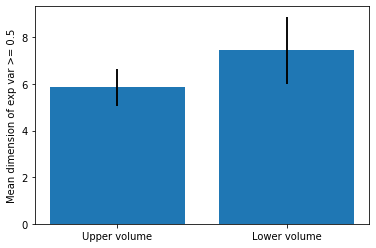

In [85]:
# calculate mean dimension of explained variance > 0.5
mean_dim_expvar_05 = [[],[]]
for mouse in mice:
    temp_expvar = expvar_results.query('mouse == @mouse')
    volumes = [1,2]
    for vi in range(2):
        volume = volumes[vi]
        temp_volume_data = temp_expvar.query('volume==@volume').reset_index()
        temp_volume_data['expvar>=0.5'] = temp_volume_data.apply(lambda x: np.argmax(np.cumsum(x['explained_variances_fit']) >= 0.5), axis=1)
        mean_dim_expvar_05[vi].append(temp_volume_data['expvar>=0.5'].mean())
fig, ax = plt.subplots()
ax.bar([0,1], [np.mean(mean_dim_expvar_05[0]), np.mean(mean_dim_expvar_05[1])], yerr=[np.std(mean_dim_expvar_05[0]), np.std(mean_dim_expvar_05[1])])
ax.errorbar(0, np.mean(mean_dim_expvar_05[0]), np.std(mean_dim_expvar_05[0]), color='k')
ax.errorbar(1, np.mean(mean_dim_expvar_05[1]), np.std(mean_dim_expvar_05[1]), color='k')
ax.set_xticks([0, 1])
ax.set_xticklabels(['Upper volume', 'Lower volume'])
ax.set_ylabel('Mean dimension of exp var >= 0.5')

In [88]:
(np.mean(mean_dim_expvar_05[0]) + np.mean(mean_dim_expvar_05[1]))/2

6.651243745361393

# Use dim = 7 for fit cells
- For touch response before answer.
- In the future, just apply all task phase to 7 and report mean exp variance and show changes across learning

# Run LDA with dim = 7
- Using multiprocessing
- Touch response before answer for now

In [95]:
top_plane = 1
mouse = 25
session = 4
spk_norm = 'std'
touch_window = 'before_answer'
varexp_threshold = 0.05
post_touch_frames = 1
volume = 1 if top_plane == 1 else 2
per_touch_response_xr_fit, per_touch_response_df, per_touch_response_xr = \
pa.get_touch_response_xr_varexp_threshold(base_dir, mouse, top_plane, session, touch_window=touch_window,
                                        spk_norm=spk_norm, varexp_threshold=varexp_threshold,
                                        post_touch_frames=post_touch_frames)


In [96]:

per_touch_response_df_45_135 = per_touch_response_df.query('pole_angle == 45 or pole_angle == 135')
tn_45_135 = per_touch_response_df_45_135.trialNum.values
per_touch_response_xr_fit_45_135 = per_touch_response_xr_fit.sel(trialNum=tn_45_135)
# check the order is the same
assert np.all(per_touch_response_xr_fit_45_135.trialNum.values == per_touch_response_df_45_135.trialNum.values)

In [102]:
reload(lda_angle)
pca = PCA()
pca.fit_transform(per_touch_response_xr_fit_45_135)
dim_nums = [*np.arange(3, 13, 2)]
lda_performances = []
for di in dim_nums:
    X_pca = pca.transform(per_touch_response_xr_fit_45_135)[:,:di]
    lda_performances.append(lda_angle.get_lda_accuracies(X_pca, per_touch_response_df_45_135.pole_angle.values))


In [114]:
def save_lda_45_135(mouse, top_plane, session, 
                    touch_window='before_answer',
                    spk_norm='std', 
                    varexp_threshold=0.05,
                    post_touch_frames=1):
    volume = 1 if top_plane == 1 else 2
    print(f'Processing JK{mouse:03} S{session:02} volume {volume}')

    per_touch_response_xr_fit, per_touch_response_df, per_touch_response_xr = \
    pa.get_touch_response_xr_varexp_threshold(base_dir, mouse, top_plane, session, touch_window=touch_window,
                                            spk_norm=spk_norm, varexp_threshold=varexp_threshold,
                                            post_touch_frames=post_touch_frames)
    
    per_touch_response_df_45_135 = per_touch_response_df.query('pole_angle == 45 or pole_angle == 135')
    tn_45_135 = per_touch_response_df_45_135.trialNum.values
    per_touch_response_xr_fit_45_135 = per_touch_response_xr_fit.sel(trialNum=tn_45_135)
    # check the order is the same
    assert np.all(per_touch_response_xr_fit_45_135.trialNum.values == per_touch_response_df_45_135.trialNum.values)
    try:
        pca = PCA()
        pca.fit_transform(per_touch_response_xr_fit_45_135)
        dim_nums = [*np.arange(3, 17, 2)]
        lda_performances = []
        for di in dim_nums:
            X_pca = pca.transform(per_touch_response_xr_fit_45_135)[:,:di]
            lda_performances.append(lda_angle.get_lda_accuracies(X_pca, per_touch_response_df_45_135.pole_angle.values))

        save_dir = base_dir / 'results' / 'neural_stretching' / 'lda_performances'
        save_dir.mkdir(exist_ok=True, parents=True)
        save_fn = save_dir / f'JK{mouse:03}_volume{volume}_S{session:02d}_lda_performances_45_135_{touch_window}.npy'
        results = {'dim_nums': dim_nums, 'lda_performances': lda_performances}
        np.save(save_fn, results)
    except:
        print(f'JK{mouse:03} S{session:02} volume {volume} failed')
        

In [115]:
test_df = use_mice_df.query('plane in [1, 5]') 
for i, row in test_df.iterrows():
    if i > 932:
        save_lda_45_135(row.mouse, row.plane, int(row.session))
# 932 took 40 min
# Next 425 took 17 min
# Total 57 min

Processing JK039 S22 volume 1
JK039 S22 volume 1 failed
Processing JK039 S23 volume 1
Processing JK039 S01 volume 2
Processing JK039 S02 volume 2
Processing JK039 S03 volume 2
Processing JK039 S04 volume 2
Processing JK039 S05 volume 2
Processing JK039 S06 volume 2
Processing JK039 S07 volume 2
Processing JK039 S08 volume 2
Processing JK039 S09 volume 2
Processing JK039 S10 volume 2
Processing JK039 S11 volume 2
Processing JK039 S12 volume 2
Processing JK039 S13 volume 2
Processing JK039 S14 volume 2
Processing JK039 S15 volume 2
Processing JK039 S16 volume 2
Processing JK039 S17 volume 2
Processing JK039 S19 volume 2
Processing JK039 S20 volume 2
Processing JK039 S21 volume 2
Processing JK039 S23 volume 2
Processing JK052 S03 volume 1
Processing JK052 S06 volume 1
Processing JK052 S08 volume 1
Processing JK052 S09 volume 1
Processing JK052 S10 volume 1
Processing JK052 S11 volume 1
Processing JK052 S12 volume 1
Processing JK052 S13 volume 1
Processing JK052 S14 volume 1
Processing JK0

In [134]:
lda_performances_upper = []
lda_performances_lower = []
session_recorded_upper = []
session_recorded_lower = []
for mouse in mice:
    for volume in [1,2]:
        top_plane = 1 if volume == 1 else 5
        sessions = [int(s) for s in use_mice_df.query('mouse==@mouse and plane==@top_plane').session.values]
        load_dir = base_dir / 'results' / 'neural_stretching' / 'lda_performances'
        session_recorded = []
        lda_performances = []
        for session in sessions:
            load_fn = load_dir / f'JK{mouse:03}_volume{volume}_S{session:02d}_lda_performances_45_135_before_answer.npy'
            if load_fn.exists():
                session_recorded.append(session)
                results = np.load(load_fn, allow_pickle=True).item()
                lda_performances.append(results['lda_performances'])
        if volume == 1:
            lda_performances_upper.append(np.array(lda_performances))
            session_recorded_upper.append(np.array(session_recorded))
        else:
            lda_performances_lower.append(np.array(lda_performances))
            session_recorded_lower.append(np.array(session_recorded))


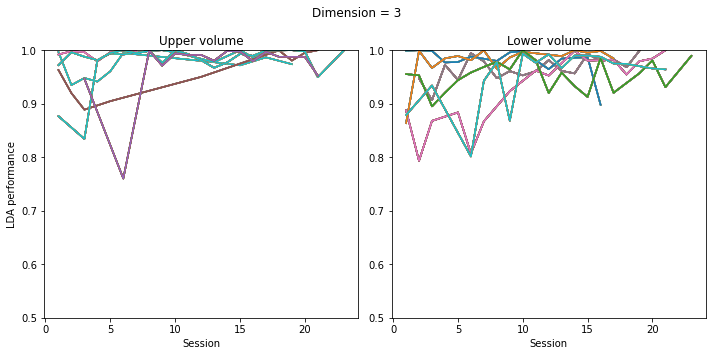

In [142]:
dim = 3
dimensions = np.arange(3, 17, 2)
dim_i = np.where(dimensions==dim)[0][0]
fig, ax = plt.subplots(1,2, figsize=(10,5))
for i in range(len(lda_performances_upper)):
    session_recorded = session_recorded_upper[i]
    lda_performances = lda_performances_upper[i]
    for j in range(len(session_recorded)):
        ax[0].plot(session_recorded, lda_performances[:,dim_i])
ax[0].set_title('Upper volume')
ax[0].set_xlabel('Session')
ax[0].set_ylabel('LDA performance')
ax[0].set_ylim([0.5, 1])
for i in range(len(lda_performances_lower)):
    session_recorded = session_recorded_lower[i]
    lda_performances = lda_performances_lower[i]
    for j in range(len(session_recorded)):
        ax[1].plot(session_recorded, lda_performances[:,dim_i])
ax[1].set_title('Lower volume')
ax[1].set_xlabel('Session')
ax[1].set_ylim([0.5, 1])
fig.suptitle(f'Dimension = {dim}')
fig.tight_layout()